In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [125]:
df= pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [127]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [128]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


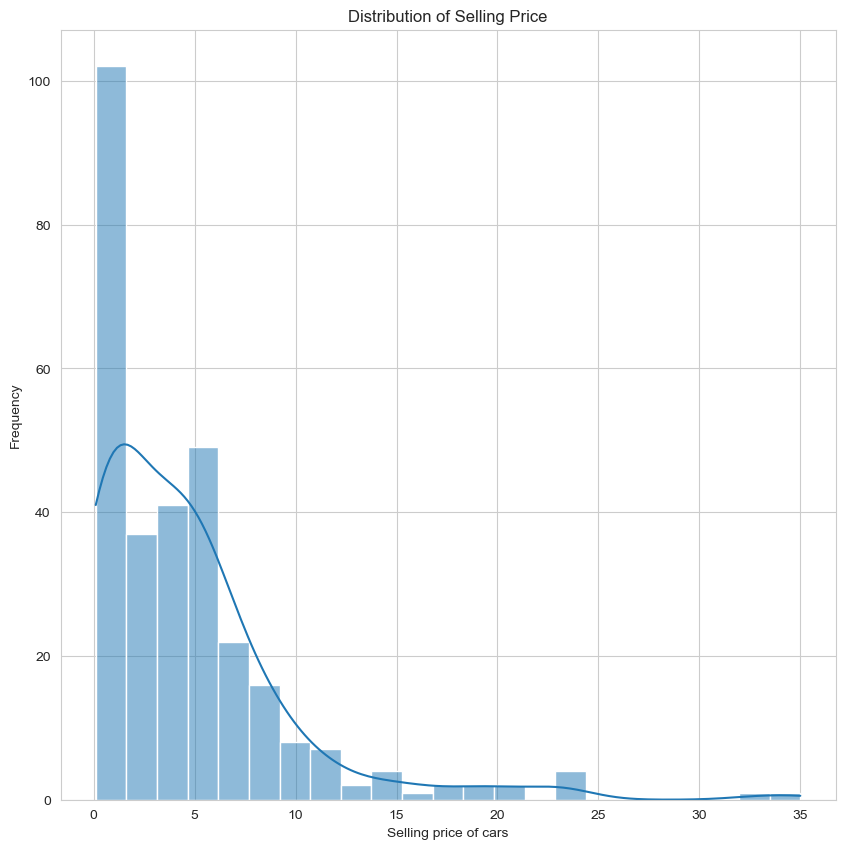

In [129]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling price of cars')
plt.ylabel('Frequency')
plt.show()

/Users/baveja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


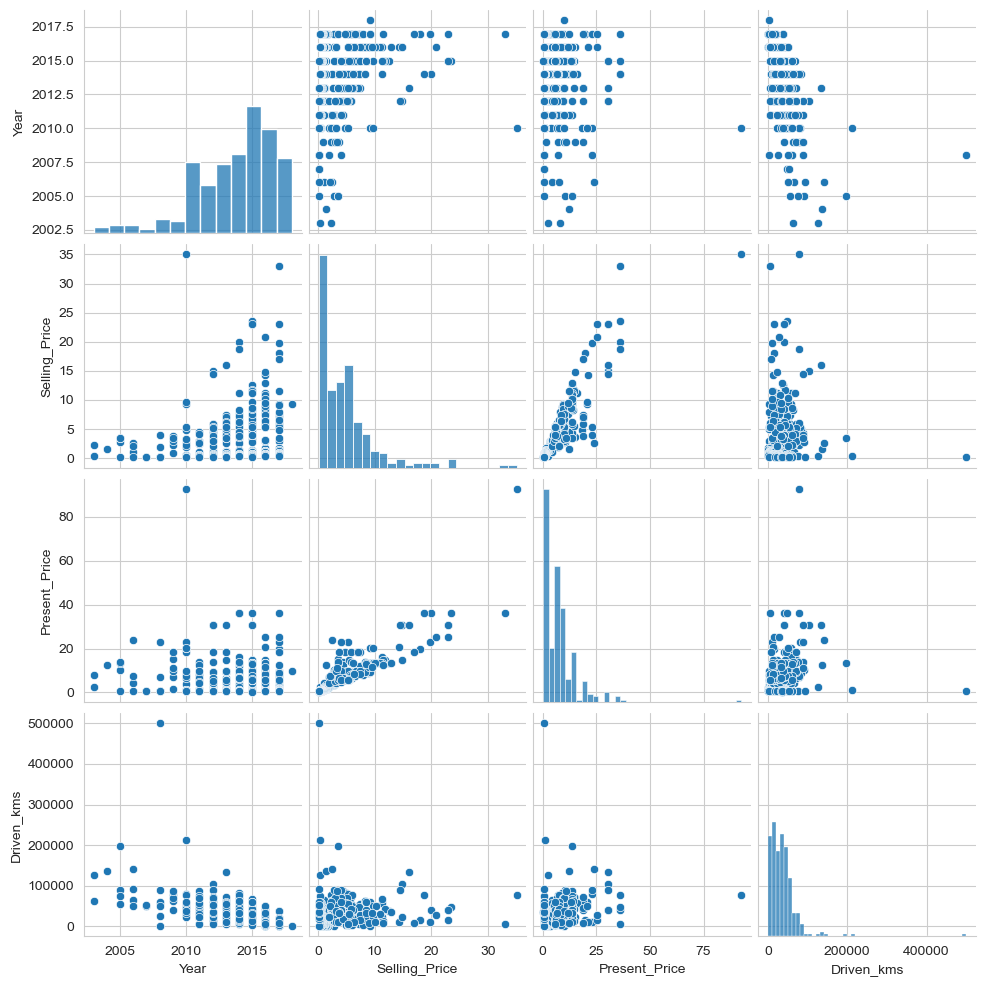

In [130]:
sns.pairplot(df, vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms'])
plt.show()

In [132]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [133]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
df.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [134]:
dummies = pd.get_dummies(df['Car_Name'])

dummies=dummies.replace({True:1, False:0})
dummies


,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
merged=pd.concat([df, dummies], axis='columns')
merged

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,ritz,2014,3.35,5.59,27000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
#remove carname col
merged=merged.drop(['Car_Name'], axis='columns')
merged

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa 3g,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
#remove dummy variable trap
final=merged.drop(['ritz'], axis='columns')
final

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa 3g,...,jazz,land cruiser,omni,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X=final.drop(['Selling_Price'], axis='columns').values
X

array([[2.0140e+03, 5.5900e+00, 2.7000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 9.5400e+00, 4.3000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 9.8500e+00, 6.9000e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0090e+03, 1.1000e+01, 8.7934e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 1.2500e+01, 9.0000e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 5.9000e+00, 5.4640e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [146]:
Y=final.Selling_Price.values
Y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=0)

In [168]:
reg=linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [169]:
reg.coef_

array([ 5.89137075e-01,  5.86023234e-01, -5.09791591e-06,  2.86210336e-01,
       -1.20413006e+00,  1.44427973e-01,  6.65901969e-01,  6.54789593e+00,
        2.71509307e+00, -1.39799801e+00, -1.21517016e-02, -4.55321575e-01,
       -5.39048668e-01, -1.08081255e+00,  1.36920386e+00,  2.18912489e+00,
        1.09684814e+00,  1.20693071e+00, -8.42845150e-01,  5.53370648e-01,
        5.00872330e-01,  2.84222556e+00,  1.13523909e+00,  1.33629136e+00,
       -4.31519553e-01,  3.93460372e+00,  2.70755738e-01,  9.18471701e-01,
        1.00295207e+00, -4.21884749e-15,  1.89136301e+00,  3.87442377e+00,
       -7.12080658e-02, -4.36465785e-01, -4.98583756e-01, -2.97701585e-01,
        5.85467156e+00, -7.78299634e-01, -1.31846895e+00, -9.08840143e-01,
        2.84430409e+00,  1.04860086e+00, -2.82084980e-02,  1.95073886e+00,
        1.05512826e+00, -1.15393594e+00,  3.54316575e+00, -8.47480762e-01,
        1.85315401e-01, -6.59388714e-01, -1.11301613e-01, -2.64193870e-01,
       -3.77248088e-01,  

In [170]:
reg.intercept_

-1185.7240256843534

In [171]:
# prediction on Training data
Y_predict = reg.predict(X_test)




In [173]:
compare=pd.DataFrame({
    'Actual': Y_test,
    'Predict':Y_predict
})
compare.head()


,Actual,Predict
0,8.25,7.065245
1,0.50,-1.230747
2,5.25,4.870866
3,9.50,8.742904
4,18.00,16.949039


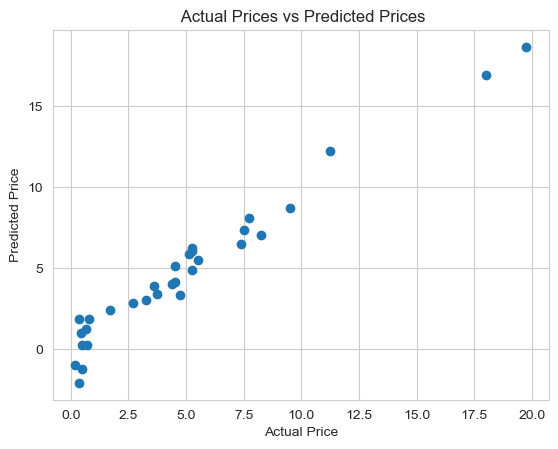

In [176]:
plt.scatter(Y_test, Y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [179]:
print("Mean_squared_error:", mean_squared_error(Y_test, Y_predict) )

Mean_squared_error: 0.8650317471951494


In [180]:
print("r2_score:", r2_score(Y_test, Y_predict) )

r2_score: 0.96069923585085
